In [1]:
import pdb
import pandas as pd
import os
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, silhouette_score
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import spearmanr
import numpy as np # Data Imputation
from sklearn.impute import KNNImputer # KNN Imputation
from imblearn.over_sampling import SMOTE # Data Imputation
from collections import Counter # Data Imputation

try:
  from google.colab import drive
  drive.mount('/content/drive')
  file_path = '/content/drive/My Drive/COMP7015 AI Project Group/mimiciv_traindata.csv'
except:
  file_path = os.path.join('data', 'mimiciv_traindata.csv')



In [2]:
df = pd.read_csv(file_path)

# Check datatypes of our dataframe
print ('\n-------------------------------------------------------------------')
print('Our data types are:\n')
print(df.dtypes)

# Check NaN values of our dataframe
print ('\n-------------------------------------------------------------------')
print('Contains NaN Values: ', df.isna().any().any())

# Check NaN values in each column
print ('\n-------------------------------------------------------------------')
print('NaN values per column: \n')
print(df.isna().sum())

# Check NaN Matrix
print ('\n-------------------------------------------------------------------')
print('NaN Matrix: \n')
print(df.isna())

# Check duplicate rows
print ('\n-------------------------------------------------------------------')
print('Contains duplicate rows: ', df.duplicated().any())

# Check summary statistics
print ('\n-------------------------------------------------------------------')
print('Summary Statistics: \n')
print(df.describe())

# Check overall shape
print ('\n-------------------------------------------------------------------')
print('Shape of our DataFrame:' , df.shape)


-------------------------------------------------------------------
Our data types are:

Fraction inspired oxygen_mean    float64
Fraction inspired oxygen_min     float64
Fraction inspired oxygen_max     float64
Glucose_mean                     float64
Glucose_min                      float64
Glucose_max                      float64
Heart Rate_mean                  float64
Heart Rate_min                   float64
Heart Rate_max                   float64
Mean blood pressure_mean         float64
Mean blood pressure_min          float64
Mean blood pressure_max          float64
Diastolic blood pressure_mean    float64
Diastolic blood pressure_min     float64
Diastolic blood pressure_max     float64
Systolic blood pressure_mean     float64
Systolic blood pressure_min      float64
Systolic blood pressure_max      float64
Oxygen saturation_mean           float64
Oxygen saturation_min            float64
Oxygen saturation_max            float64
Respiratory rate_mean            float64
Respirat

In [3]:


# KNN Imputation (Imputation for Missing Value)
knn_imputer = KNNImputer(n_neighbors=3)
df_imputed = knn_imputer.fit_transform(df)

# Convert the result back to a DataFrame
df_imputed = pd.DataFrame(df_imputed, columns=df.columns)

# Calculate Range
df_imputed['Fraction inspired oxygen_range'] =  df_imputed['Fraction inspired oxygen_max'] -  df_imputed['Fraction inspired oxygen_min']
df_imputed['Glucose_range'] =  df_imputed['Glucose_max'] -  df_imputed['Glucose_min']
df_imputed['Heart Rate_range'] =  df_imputed['Heart Rate_max'] -  df_imputed['Heart Rate_min']
df_imputed['Mean blood pressure_range'] =  df_imputed['Mean blood pressure_max'] -  df_imputed['Mean blood pressure_min']
df_imputed['Diastolic blood pressure_range'] =  df_imputed['Diastolic blood pressure_max'] -  df_imputed['Diastolic blood pressure_min']
df_imputed['Systolic blood pressure_range'] =  df_imputed['Systolic blood pressure_max'] -  df_imputed['Systolic blood pressure_min']
df_imputed['Oxygen saturation_range'] =  df_imputed['Oxygen saturation_max'] -  df_imputed['Oxygen saturation_min']
df_imputed['Respiratory rate_range'] =  df_imputed['Respiratory rate_max'] -  df_imputed['Respiratory rate_min']
df_imputed['Temperature_range'] =  df_imputed['Temperature_max'] -  df_imputed['Temperature_min']
df_imputed['Weight_range'] =  df_imputed['Weight_max'] -  df_imputed['Weight_min']
df_imputed['pH_range'] =  df_imputed['pH_max'] -  df_imputed['pH_min']

# Create Ratios
df_imputed['Fraction inspired oxygen_min_to_mean'] = df_imputed['Fraction inspired oxygen_min'] / df_imputed['Fraction inspired oxygen_mean']
df_imputed['Fraction inspired oxygen_max_to_mean'] = df_imputed['Fraction inspired oxygen_max'] / df_imputed['Fraction inspired oxygen_mean']
df_imputed['Glucose_min_to_mean'] = df_imputed['Glucose_min'] / df_imputed['Glucose_mean']
df_imputed['Glucose_max_to_mean'] = df_imputed['Glucose_max'] / df_imputed['Glucose_mean']
df_imputed['Heart Rate_min_to_mean'] = df_imputed['Heart Rate_min'] / df_imputed['Heart Rate_mean']
df_imputed['Heart Rate_max_to_mean'] = df_imputed['Heart Rate_max'] / df_imputed['Heart Rate_mean']
df_imputed['Mean blood pressure_min_to_mean'] = df_imputed['Mean blood pressure_min'] / df_imputed['Mean blood pressure_mean']
df_imputed['Mean blood pressure_max_to_mean'] = df_imputed['Mean blood pressure_max'] / df_imputed['Mean blood pressure_mean']
df_imputed['Diastolic blood pressure_min_to_mean'] = df_imputed['Diastolic blood pressure_min'] / df_imputed['Diastolic blood pressure_mean']
df_imputed['Diastolic blood pressure_max_to_mean'] = df_imputed['Diastolic blood pressure_max'] / df_imputed['Diastolic blood pressure_mean']
df_imputed['Systolic blood pressure_min_to_mean'] = df_imputed['Systolic blood pressure_min'] / df_imputed['Systolic blood pressure_mean']
df_imputed['Systolic blood pressure_max_to_mean'] = df_imputed['Systolic blood pressure_max'] / df_imputed['Systolic blood pressure_mean']
df_imputed['Oxygen saturation_min_to_mean'] = df_imputed['Oxygen saturation_min'] / df_imputed['Oxygen saturation_mean']
df_imputed['Oxygen saturation_max_to_mean'] = df_imputed['Oxygen saturation_max'] / df_imputed['Oxygen saturation_mean']
df_imputed['Respiratory rate_min_to_mean'] = df_imputed['Respiratory rate_min'] / df_imputed['Respiratory rate_mean']
df_imputed['Respiratory rate_max_to_mean'] = df_imputed['Respiratory rate_max'] / df_imputed['Respiratory rate_mean']
df_imputed['Temperature_min_to_mean'] = df_imputed['Temperature_min'] / df_imputed['Temperature_mean']
df_imputed['Temperature_max_to_mean'] = df_imputed['Temperature_max'] / df_imputed['Temperature_mean']
df_imputed['Weight_min_to_mean'] = df_imputed['Weight_min'] / df_imputed['Weight_mean']
df_imputed['Weight_max_to_mean'] = df_imputed['Weight_max'] / df_imputed['Weight_mean']
df_imputed['pH_min_to_mean'] = df_imputed['pH_min'] / df_imputed['pH_mean']
df_imputed['pH_max_to_mean'] = df_imputed['pH_max'] / df_imputed['pH_mean']

In [4]:
# Features & Target
X = df_imputed.drop(columns='mortality')
y = df_imputed['mortality']

print ('\n-------------------------------------------------------------------')
print(f'The shape of X after adding new features is : {pd.DataFrame(X).shape}')
print ('\n-------------------------------------------------------------------')
print(f'The shape of y is : {pd.DataFrame(y).shape}')

# Standardizing the Features by Z-score Normalization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


-------------------------------------------------------------------
The shape of X after adding new features is : (5647, 66)

-------------------------------------------------------------------
The shape of y is : (5647, 1)



-------------------------------------------------------------------


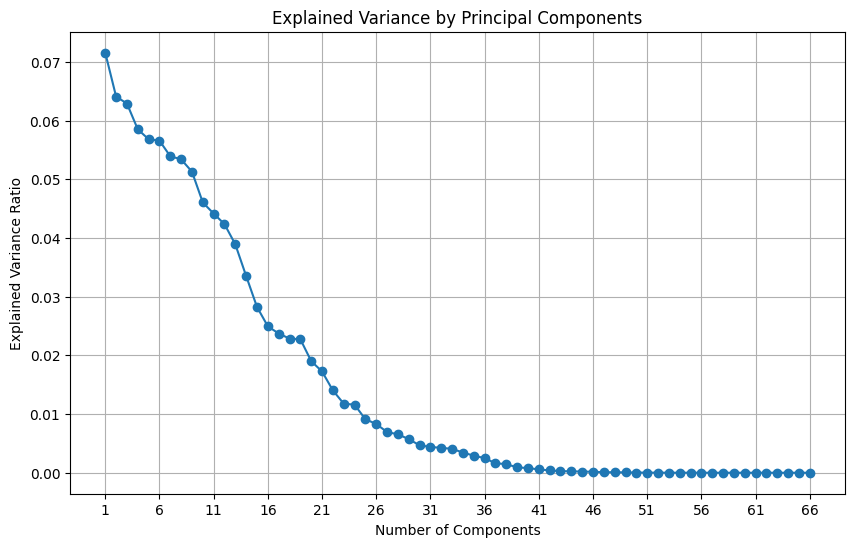


-------------------------------------------------------------------
DataFrame with selected principal components:
            PC1       PC2       PC3       PC4       PC5        PC6       PC7  \
0     -0.531921 -0.111409  0.223460 -0.306810 -0.716768   1.369607 -0.256134   
1      0.628350 -0.498287  0.046910  0.333997 -0.099570  -0.770838  0.198291   
2      1.979594  0.432638  0.011849  0.583708  0.423613   0.013125  0.134008   
3      0.040862  0.508886  0.884186  0.979439 -1.092478  -0.150423  0.020377   
4    -16.781681  1.945337 -5.959974 -7.428325 -0.495336  10.993943 -2.071000   
...         ...       ...       ...       ...       ...        ...       ...   
5642   1.509146  1.189175 -0.190738 -0.133853  0.493003   0.050681 -0.424372   
5643   1.628150  0.035821  0.581318  0.126489 -0.328496  -0.020172 -0.260023   
5644   1.841276  0.182577  0.619145  0.376612 -0.145637   0.843722 -0.159323   
5645   1.046921  0.122527  0.372516  0.161544 -0.010617   0.303357  0.026925   
5646 

In [5]:


# Apply PCA
pca = PCA()
X_pca= pca.fit_transform(X_scaled)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Plot explained variance to decide number of components
print ('\n-------------------------------------------------------------------')
plt.figure(figsize=(10,6))
plt.plot(range(1,len(explained_variance) + 1), explained_variance, marker='o')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(explained_variance) + 1, 5))
plt.grid()
plt.show()

# Choose the number of components
n_components = 0.95
cumulative_variance = np.cumsum(explained_variance)
n_components_selected = np.argmax(cumulative_variance >= n_components) + 1

# Transform the dataset to the selected number of components
pca = PCA(n_components = n_components_selected)
X_pca_selected = pca.fit_transform(X_scaled)

# Create a DataFrame with the selected principal components
columns = [f'PC{i+1}' for i in range(n_components_selected)]
df_pca = pd.DataFrame(data = X_pca_selected, columns=columns)



# Concatenate with the target variable
df_after_pca = pd.concat([df_pca, y.reset_index(drop=True)], axis=1)

# Print the resulting DataFrame
print ('\n-------------------------------------------------------------------')
print('DataFrame with selected principal components:')
print(df_after_pca)

# Features & Target
X = df_after_pca.drop(columns='mortality')
y = df_after_pca['mortality']

In [6]:


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid
param_grid ={
    'n_estimators': [100, 200, 300],
    'max_samples': [0.5, 0.8, 1.0],
    'contamination': [0.01, 0.05, 0.1],
    'max_features': [0.5, 0.75, 1.0]
}

# Outlier Detection with Isolation Forest
iso_forest = IsolationForest()

# Function to Evaluate the Model
def evaluate_model(X, n_estimators, max_samples, contamination, max_features):
  model = IsolationForest(n_estimators=n_estimators,
                          max_samples=max_samples,
                          contamination=contamination,
                          max_features=max_features,
                          random_state=42)
  model.fit(X)
  scores = model.decision_function(X)
  predictions = model.predict(X)
  labels = np.where(predictions == -1, 0, 1)
  return scores, labels

# Grid Search for Hyperparameter Tuning
best_score = -np.inf
best_params = None

# Loop through parameter combinations
for n_estimators in param_grid['n_estimators']:
  for max_samples in param_grid['max_samples']:
    for contamination in param_grid['contamination']:
      for max_features in param_grid['max_features']:
        scores, labels = evaluate_model(X, n_estimators, max_samples, contamination, max_features)
        if len(set(labels))>1:
          silhouette_avg = silhouette_score(X, labels)
        #print(f'Params:n_estimators={n_estimators}, max_samples={max_samples}, contamination={contamination}, max_features={max_features}, 'f'Silhouette Score: {silhouette_avg}')
        if silhouette_avg > best_score:
          best_score = silhouette_avg
          best_params = (n_estimators, max_samples, contamination, max_features)
print ('\n-------------------------------------------------------------------')
print('Best Parameeters are: ', best_params)


-------------------------------------------------------------------
Best Parameeters are:  (200, 0.5, 0.01, 0.75)


In [7]:
# Fit the best Isolation Forest model
best_iso_forest = IsolationForest(n_estimators=best_params[0], max_samples=best_params[1], contamination=best_params[2], max_features=best_params[3], random_state=42)
best_iso_forest.fit (X_train)

# Predict Outliers (-1 for outlier, 1 for inlier)
iso_outlier_predictions = best_iso_forest.predict(X_train)

# Identify Outliers
outliers = X_train[iso_outlier_predictions == -1]

# Display Original Data Size and Outliers Found
print ('\n-------------------------------------------------------------------')
print (f'Size of training data: {X_train.shape}')
print (f'Outliers found: {outliers.shape}')


-------------------------------------------------------------------
Size of training data: (4517, 27)
Outliers found: (46, 27)


In [8]:
# Calculate & Print Spearman Rank
df_spearman = pd.DataFrame(X_train, columns=[f'PC{i+1}' for i in range(X_train.shape[1])])
df_spearman['is_outlier'] = np.where(iso_outlier_predictions == -1, 1, 0)
df_spearman['mortality'] = y_train.values
spearman_corr, p_value = spearmanr(df_spearman['is_outlier'], df_spearman['mortality'])
print ('\n-------------------------------------------------------------------')
print(f'Spearman Rank Correlation Coefficient: {spearman_corr}')
print(f'P-value: {p_value}')


-------------------------------------------------------------------
Spearman Rank Correlation Coefficient: 0.0022441876641304693
P-value: 0.880143564320927



-------------------------------------------------------------------
Size of Cleaned X: (4471, 27)

-------------------------------------------------------------------
Original Dataset Shape: mortality
0.0    3348
1.0    1123
Name: count, dtype: int64


C:\Users\johne\AppData\Local\Temp\ipykernel_76604\908694656.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(class_count_dict.keys()), y=list(class_count_dict.values()), palette='pastel')


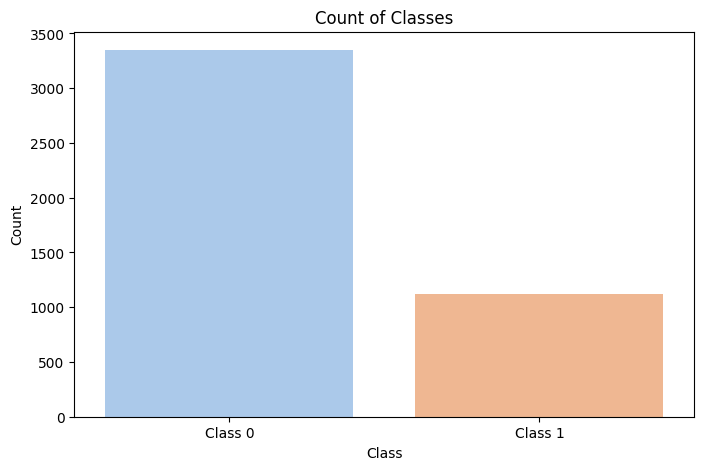


Resampled Dataset Shape: mortality
1.0    3348
0.0    3348
Name: count, dtype: int64

-------------------------------------------------------------------
Accuracy with class weights balanced: 0.74

-------------------------------------------------------------------
Classification Report with class weights balanced (0 - Alive / 1 - Dead):


              precision    recall  f1-score   support

         0.0       0.80      0.87      0.83       850
         1.0       0.46      0.34      0.39       280

    accuracy                           0.74      1130
   macro avg       0.63      0.60      0.61      1130
weighted avg       0.71      0.74      0.72      1130


-------------------------------------------------------------------
Confusion Matrix:
[[737 113]
 [185  95]]

-------------------------------------------------------------------
ROC-AUC Score with class weights balanced: 0.6687


In [9]:


# Remove Outliers from the Training Data
X_train_cleaned = X_train[iso_outlier_predictions == 1]
y_train_cleaned = y_train[iso_outlier_predictions == 1]
print ('\n-------------------------------------------------------------------')
print(f'Size of Cleaned X:', X_train_cleaned.shape)

# Applying SMOTE (Oversampling Technique)
smote = SMOTE(random_state = 42)
X_resampled, y_resampled = smote.fit_resample(X_train_cleaned, y_train_cleaned)
print ('\n-------------------------------------------------------------------')
print('Original Dataset Shape:', y_train_cleaned.value_counts())

# Count the occurrences of each class
class_counts = y_train_cleaned.value_counts()

# Original and resampled data
class_count_dict = {'Class 0': class_counts.get(0, 0), 'Class 1': class_counts.get(1, 0)}

# Create a bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x=list(class_count_dict.keys()), y=list(class_count_dict.values()), palette='pastel')

# Add titles and labels
plt.title('Count of Classes')
plt.xlabel('Class')
plt.ylabel('Count')

# Show the plot
plt.xticks(rotation=0)  # Optional: rotate x-axis labels if needed
plt.show()

print('\nResampled Dataset Shape:', y_resampled.value_counts())

# Train the Random Forest Classifier by our training data
classifier = RandomForestClassifier(class_weight='balanced', random_state=42)
classifier.fit(X_resampled, y_resampled)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print ('\n-------------------------------------------------------------------')
print(f'Accuracy with class weights balanced: {accuracy:.2f}')

# Print classification report (includes precision, recall, and F1 score)
print ('\n-------------------------------------------------------------------')
print('Classification Report with class weights balanced (0 - Alive / 1 - Dead):')
print('\n')
print(classification_report(y_test, y_pred))

# Get predicted probabilities for the positive class
y_pred_proba = classifier.predict_proba(X_test)[:, 1]

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Evaluate the model
print ('\n-------------------------------------------------------------------')
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print ('\n-------------------------------------------------------------------')
print(f'ROC-AUC Score with class weights balanced: {roc_auc:.4f}')